<a href="https://colab.research.google.com/github/cmccomb/TrussMe/blob/main/examples/stochastic_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install TrussMe

In [1]:
!pip install git+https://github.com/cmccomb/TrussMe.git

  Cloning https://github.com/cmccomb/TrussMe.git to /tmp/pip-req-build-vobgrsec
  Running command git clone --filter=blob:none --quiet https://github.com/cmccomb/TrussMe.git /tmp/pip-req-build-vobgrsec
  Resolved https://github.com/cmccomb/TrussMe.git to commit bea0b8f8e46c37857a7a8e5d833188ea2e49dc06
  Preparing metadata (setup.py) ... done
  Created wheel for trussme: filename=trussme-0.0.1-py3-none-any.whl size=15546 sha256=a7d1d1c58cfb6e91159e79991a62594997caaf5f70de1d6b756bd6e489358d93
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vxmkj3w/wheels/9e/d6/07/c413d2aabc4a1d1e1032d2bd4829c54bb31cd0744f1190e868
Successfully built trussme


# Construct Truss

In [2]:
import numpy
import trussme
import scipy.spatial

## Make joints

In [193]:
inner_radius = 0.8
outer_radius = 1.0
number_of_initial_joints = 1000

In [194]:
xy = 2*outer_radius*numpy.random.rand(number_of_initial_joints, 2) - outer_radius

In [195]:
filtered_xy = []
for row in xy:
    if numpy.sqrt(row[0]**2 + row[1]**2) < outer_radius and numpy.sqrt(row[0]**2 + row[1]**2) > inner_radius and row[1] > 0:
        filtered_xy.append([row[0], row[1]])

filtered_xy.append([-outer_radius, 0.0])
filtered_xy.append([-inner_radius, 0.0])
filtered_xy.append([outer_radius, 0.0])
filtered_xy.append([inner_radius, 0.0])
filtered_xy.append([0.0, outer_radius])

## Make Members

In [196]:
tri = scipy.spatial.Delaunay(filtered_xy)

In [197]:
connectivity = numpy.zeros((len(filtered_xy),len(filtered_xy)))

In [198]:
for row in tri.simplices:
    connectivity[row[0], row[1]] = 1
    connectivity[row[1], row[2]] = 1
    connectivity[row[0], row[2]] = 1
    connectivity[row[1], row[0]] = 1
    connectivity[row[2], row[1]] = 1
    connectivity[row[2], row[0]] = 1

## Build Truss

In [199]:
truss = trussme.Truss()

for joint in filtered_xy[:-5]:
    truss.add_free_joint([joint[0], joint[1], 0])

for joint in filtered_xy[-5:-1]:
    truss.add_pinned_joint([joint[0], joint[1], 0])

loaded_joint = truss.add_free_joint([filtered_xy[-1][0], filtered_xy[-1][1], 0])
truss.set_load(loaded_joint, [0, -10000, 0])
truss.add_out_of_plane_support("z")

for idx in range(len(filtered_xy)):
    for jdx in range(idx, len(filtered_xy)):
        if connectivity[idx][jdx]:
            midpoint = (numpy.array(truss.joints[idx].coordinates) + numpy.array(truss.joints[jdx].coordinates))/2
            if numpy.sqrt(midpoint[0]**2 + midpoint[1]**2) > 0.95*inner_radius:
                truss.add_member(idx, jdx)


# Analyze and Show the Truss

In [200]:
truss.analyze()

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date></dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.7.1, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 345.6 \nL 460.8 345.

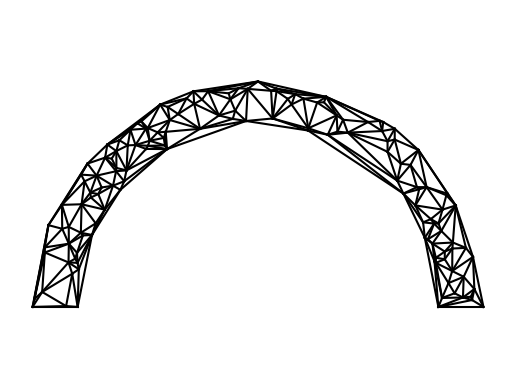

In [201]:
trussme.visualize.plot_truss(truss, deflected_shape=False)

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date></dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.7.1, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 345.6 \nL 460.8 345.

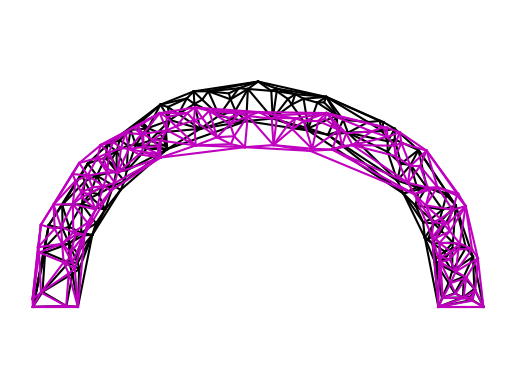

In [202]:
trussme.visualize.plot_truss(truss, deflected_shape=True, exaggeration_factor=1000)